In [52]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:


read_file = pd.read_csv (r'C:\Users\Johan\Downloads\dataset_TIST2015\dataset_TIST2015_POIs.txt', names=["Pid", "Latitude", "Longtitude", "Category", "Country"], sep='\t')
read_file.to_csv (r'C:\Users\Johan\Documents\POI_dataset\TIST2015_POIs.csv', index=None)

In [4]:


read_file = pd.read_csv (r'C:\Users\Johan\Downloads\dataset_TIST2015\dataset_TIST2015_Checkins.txt', names=["Uid","Pid","Timestamp", "TimezoneOffset"], sep='\t')
read_file.to_csv (r'C:\Users\Johan\Documents\POI_dataset\TIST2015_Checkins.csv', index=None)

In [14]:
def read_data(path):
    files = {}
    for filename in path.glob('*'):
        if filename.suffix == '.csv':
            files[filename.stem] = pd.read_csv(filename)
        elif filename.suffix == '.txt':
            if filename.stem == "TIST2015_POIs":
                columns = ["Pid", "Latitude", "Longtitude", "Category", "Country"]
            elif filename.stem == "TIST2015_POIs_Checkins":
                columns = ["Uid","Pid","Timestamp", "TimezoneOffset"]
            else:
                continue
            data = pd.read_csv(filename, names=columns, engine='python')
            files[filename.stem] = data

    return files['TIST2015_POIs'], files['TIST2015_Checkins']

In [15]:
# pick one of the available folders
pois, checkins = read_data(Path(r'C:\Users\Johan\Documents\POI_dataset'))

In [16]:

checkins.head()

,Uid,Pid,Timestamp,TimezoneOffset
0,50756,4f5e3a72e4b053fd6a4313f6,Tue Apr 03 18:00:06 +0000 2012,240
1,190571,4b4b87b5f964a5204a9f26e3,Tue Apr 03 18:00:07 +0000 2012,180
2,221021,4a85b1b3f964a520eefe1fe3,Tue Apr 03 18:00:08 +0000 2012,-240
3,66981,4b4606f2f964a520751426e3,Tue Apr 03 18:00:08 +0000 2012,-300
4,21010,4c2b4e8a9a559c74832f0de2,Tue Apr 03 18:00:09 +0000 2012,240


<AxesSubplot:ylabel='Frequency'>

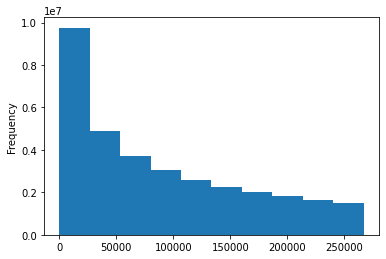

In [21]:
checkins["Uid"].plot(kind='hist')


In [25]:
checkins.describe(include=object)

,Pid,Timestamp
count,33263633,33263633
unique,3680126,17831682
top,4b49cb0ff964a520b67326e3,Tue Jun 12 06:32:06 +0000 2012
freq,34509,33


In [23]:
checkins["Uid"].value_counts()


2         5430
3         4822
7         4284
10        4104
4         4024
          ... 
226915       1
179          1
168384       1
142677       1
70957        1
Name: Uid, Length: 266909, dtype: int64

In [38]:
user_checkins_counts = checkins.groupby('Uid')['Pid'].count()

##points_checkins_counts = checkins.groupby('Pid')['Uid'].count()

In [58]:
Users = checkins['Uid'].unique()
print(len(Users))
Ncheckins = np.zeros(len(Users))
for user,i in zip(Users, range(len(Users))):
    Ncheckins[i] = np.where(checkins['Uid'] == Users)

266907


ValueError: ('Lengths must match to compare', (33263633,), (266907,))

In [ ]:
plt.hist(user_checkins_counts)
plt.show()
##user_checkins_counts.plot(kind='hist', x=user_checkins_counts, y=points_checkins_counts)

In [61]:
def tabular_preview(checkins, n=15):
    """Creates a cross-tabular view of users vs movies."""

    user_groups = checkins.groupby('Uid')['Pid'].count()
    top_users = user_groups.sort_values(ascending=False)[:15]

    poi_groups = checkins.groupby('Pid')['Uid'].count()
    top_pois = poi_groups.sort_values(ascending=False)[:15]

    top = (
        checkins.
        join(top_users, rsuffix='_r', how='inner', on='Uid').
        join(top_pois, rsuffix='_r', how='inner', on='Pid'))

    plt.hist(top)
    plt.show()

ConversionError: Failed to convert value(s) to axis units: array(['4b684c69f964a5204f702be3', '4c25ea28905a0f4787466260',
       '4c25ea28905a0f4787466260', '4c25ea28905a0f4787466260',
       '4c25ea28905a0f4787466260', '4c25ea28905a0f4787466260',
       '4b50966af964a520632827e3', '4b50966af964a520632827e3',
       '4b49cb0ff964a520b67326e3', '4d8cce87cb9b224bb19c5d41',
       '4be139c2c1732d7f797c5b9a', '4be139c2c1732d7f797c5b9a',
       '4be139c2c1732d7f797c5b9a', '4be139c2c1732d7f797c5b9a',
       '4be139c2c1732d7f797c5b9a', '4be139c2c1732d7f797c5b9a',
       '4b8669acf964a5201a8931e3', '4b8669acf964a5201a8931e3',
       '4b8669acf964a5201a8931e3', '4b8669acf964a5201a8931e3',
       '4b8669acf964a5201a8931e3', '4b4f537ef964a5206d0127e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b19f917f964a520abe623e3',
       '4b19f917f964a520abe623e3', '4b0587a6f964a5203d9e22e3',
       '4b0587a6f964a5203d9e22e3', '4b0587a6f964a5203d9e22e3',
       '4b0587a6f964a5203d9e22e3', '4b0587a6f964a5203d9e22e3',
       '4b0587a6f964a5203d9e22e3', '4b0587a6f964a5203d9e22e3',
       '4b0587a6f964a5203d9e22e3', '4b0587a6f964a5203d9e22e3',
       '4b0587a6f964a5203d9e22e3', '4b243a7df964a520356424e3',
       '4b243a7df964a520356424e3', '4b243a7df964a520356424e3',
       '4b243a7df964a520356424e3', '4b243a7df964a520356424e3',
       '4b243a7df964a520356424e3', '4b243a7df964a520356424e3',
       '4b243a7df964a520356424e3', '4b243a7df964a520356424e3',
       '4b243a7df964a520356424e3', '4b0587fdf964a52034ab22e3'],
      dtype=object)

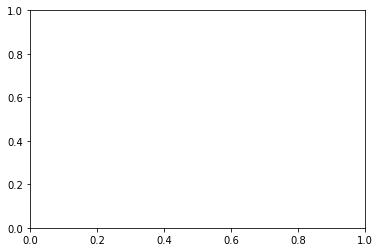

In [62]:
tabular_preview(checkins)
